In [17]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import umap 
from sklearn.manifold import  TSNE

In [36]:
an_df = pd.read_csv("annotations.csv")
meta_df = pd.read_csv("metadata.csv")
an_df.head(5)

task_id    filename                                          annotator  \
0  161976549  117126.mp3  1145579747015607221221744067969991550764671773...   
1  161976549  117126.mp3  1145579747015607221221744067969991550764671773...   
2  161976550  118234.mp3  5022633589939139634134314703519782680423201448...   
3  161976550  118234.mp3  5022633589939139634134314703519782680423201448...   
4  161976551  119173.mp3  8105077500224920444298835829881210427871190692...   

                                                text      onset     offset  \
0  An alarm is ringing loudly and repeatedly nearby.   0.000000  10.503064   
1             An alarm is ringing repeatedly nearby.  12.514616  23.048000   
2            An alarm clock is beeping continuously.   0.000000  13.414880   
3            An alarm clock is beeping continuously.  15.134252  28.492000   
4     A car alarm sounds loudly in a steady pattern.   0.000000  20.065604   

       time                                   original_caption  \
0   345.033     Raw loud alarm sound repeatedly ringing nearby   
1   345.033        Clean alarm sound repeatedly ringing nearby   
2   919.016                    Alarm clock beeping continuesly   
3   919.016                    Alarm clock beeping continuesly   
4  2162.620  a car alarm sounds loudly in a steady pattern ...   

                categories  
0                ['Alarm']  
1                ['Alarm']  
2  ['Alarm', 'Beep/Bleep']  
3  ['Alarm', 'Beep/Bleep']  
4         ['Alarm', 'Car']

In [82]:
import ast  # Safe way to parse string to list

# Convert category string to actual list, then to comma-separated string
an_df["labels"] = an_df["categories"].apply(lambda x: ', '.join(sorted(ast.literal_eval(x))))

an_df.head(15)

task_id    filename                                          annotator  \
0   161976549  117126.mp3  1145579747015607221221744067969991550764671773...   
1   161976549  117126.mp3  1145579747015607221221744067969991550764671773...   
2   161976550  118234.mp3  5022633589939139634134314703519782680423201448...   
3   161976550  118234.mp3  5022633589939139634134314703519782680423201448...   
4   161976551  119173.mp3  8105077500224920444298835829881210427871190692...   
5   161976551  119173.mp3  8105077500224920444298835829881210427871190692...   
6   161976551  119173.mp3  8105077500224920444298835829881210427871190692...   
7   161976551  119173.mp3  8105077500224920444298835829881210427871190692...   
8   161976551  119173.mp3  8470470281049220357050845575727666219477568561...   
9   161976551  119173.mp3  8470470281049220357050845575727666219477568561...   
10  161976551  119173.mp3  8470470281049220357050845575727666219477568561...   
11  161976552  120526.mp3  1008676408550769604538252708683068191252768292...   
12  161976552  120526.mp3  1008676408550769604538252708683068191252768292...   
13  161976552  120526.mp3  1008676408550769604538252708683068191252768292...   
14  161976552  120526.mp3  1008676408550769604538252708683068191252768292...   

                                                 text      onset     offset  \
0   An alarm is ringing loudly and repeatedly nearby.   0.000000  10.503064   
1              An alarm is ringing repeatedly nearby.  12.514616  23.048000   
2             An alarm clock is beeping continuously.   0.000000  13.414880   
3             An alarm clock is beeping continuously.  15.134252  28.492000   
4      A car alarm sounds loudly in a steady pattern.   0.000000  20.065604   
5   Several people are talking outdoors at differe...   0.017964   6.233451   
6         Car engine noises continue in the distance.   1.760456   8.802279   
7           A car is slowly passing by on the street.  20.011713  25.113442   
8                                An alarm is ringing.   0.000000  20.060297   
9                                   A car is rolling.  20.032280  25.131406   
10              People are talking in the background.   0.168103   6.780156   
11                               An alarm is beeping.   0.539950   1.002917   
12                               An alarm is beeping.   1.538216   2.010421   
13                               An alarm is beeping.   2.537616   3.009821   
14                               An alarm is beeping.   3.539781   4.011986   

        time                                   original_caption  \
0    345.033     Raw loud alarm sound repeatedly ringing nearby   
1    345.033        Clean alarm sound repeatedly ringing nearby   
2    919.016                    Alarm clock beeping continuesly   
3    919.016                    Alarm clock beeping continuesly   
4   2162.620  a car alarm sounds loudly in a steady pattern ...   
5   2162.620  several people talking outdoors in different d...   
6   2162.620  car engine noises continuously outside in the ...   
7   2162.620          car slowly passing by outside on a street   
8    195.015                                an alarm is ringing   
9    195.015                         the noise of a rolling car   
10   195.015               people are talking in the background   
11  3867.481                                         alarm beep   
12  3867.481                                         alarm beep   
13  3867.481                                         alarm beep   
14  3867.481                                         alarm beep   

                 categories             labels    hue_label  
0                 ['Alarm']              Alarm        False  
1                 ['Alarm']              Alarm        False  
2   ['Alarm', 'Beep/Bleep']  Alarm, Beep/Bleep        False  
3   ['Alarm', 'Beep/Bleep']  Alarm, Beep/Bleep        False  
4          ['Alarm', 'Car']         Alarm, Car        False  
5              

In [48]:
count=0
for c,a in zip(an_df["categories"],an_df["text"]):
    c =c.strip("[]' ,")
    if c.lower()in a :
        count+=1
print(count)

11197


In [28]:
import re

count = 0
for c,a in zip(an_df["categories"],an_df["text"]):
    c =c.strip("[]' ,")
    keywords = c.lower().split("/")
    for keyword in keywords:
        if re.search(rf'\b{re.escape(keyword.lower())}\b', a.lower()):
            count+=1 
print(count)

10052


In [22]:
acc = 10044/27552
print(acc)

0.3645470383275261


**Useful audio features**

In [54]:
feature_names= ["embeddings","melspectrogram","mfcc","mfcc_delta","mfcc_delta2","flatness","centroid","bandwidth","flux","contrast","energy","zerocrossingrate","power"]

In [55]:
# dict keys:feature names values: sample values 
from sklearn.preprocessing import StandardScaler
features= {}
for i in feature_names:
    features[i] = []

for i in feature_names:
    for idx, row in meta_df.iterrows():
        file_name = idx.replace("mp3", "npz")
        path_to_feature_file = os.path.join(r"C:\Users\user\Desktop\MLPC\repo\MLPC2025-Team-Fumbling\classification", "audio_features", file_name)
        feature = np.load(path_to_feature_file)[i]
        features[i].append(feature)
    





In [56]:
len(features["power"])

8230

In [57]:
feature_variance = {}
for i in features:
    feature_variance[i] = []

for i in  features.keys():
    all_data = np.concatenate(features[i], axis=0) 
    var_vector = np.var(all_data, axis=0)  
    mean_var=np.mean(var_vector)
    feature_variance[i] = mean_var  
feature_variance

{'embeddings': np.float32(0.16442703),
 'melspectrogram': np.float32(4.016461),
 'mfcc': np.float32(7.959279),
 'mfcc_delta': np.float32(0.037362736),
 'mfcc_delta2': np.float32(0.011687588),
 'flatness': np.float32(0.00817734),
 'centroid': np.float64(890953.9930197635),
 'bandwidth': np.float64(541192.703126001),
 'flux': np.float32(231.32498),
 'contrast': np.float64(21.712449751112842),
 'energy': np.float32(27275.74),
 'zerocrossingrate': np.float64(0.015339804531648233),
 'power': np.float32(8012926.0)}

In [37]:
def summarize_feature(feature_list, agg_func=np.mean):
    """Summarize each sample in a feature list using agg_func (mean, var, etc.)"""
    return [agg_func(sample) if isinstance(sample, (np.ndarray, list)) else sample
            for sample in feature_list]

summary_dict = {}
for feature_name, sample_list in features.items():
    summary_dict[feature_name] = summarize_feature(sample_list, agg_func=np.mean)  # or np.var, np.median, etc.

df_summary = pd.DataFrame(summary_dict)
corr_matrix = df_summary.corr()

In [38]:
feature_variance["index"]=[0]
feature_variance["index"]
var_df = pd.DataFrame.from_dict(feature_variance)
var_df

embeddings  melspectrogram      mfcc  mfcc_delta  mfcc_delta2  flatness  \
0    0.164427        4.016461  7.959279    0.037363     0.011688  0.008177   

       centroid      bandwidth        flux  contrast        energy  \
0  890953.99302  541192.703126  231.324982  21.71245  27275.740234   

   zerocrossingrate      power  index  
0           0.01534  8012926.0      0

Text(0.5, 1.0, 'variance of single dimesional features')

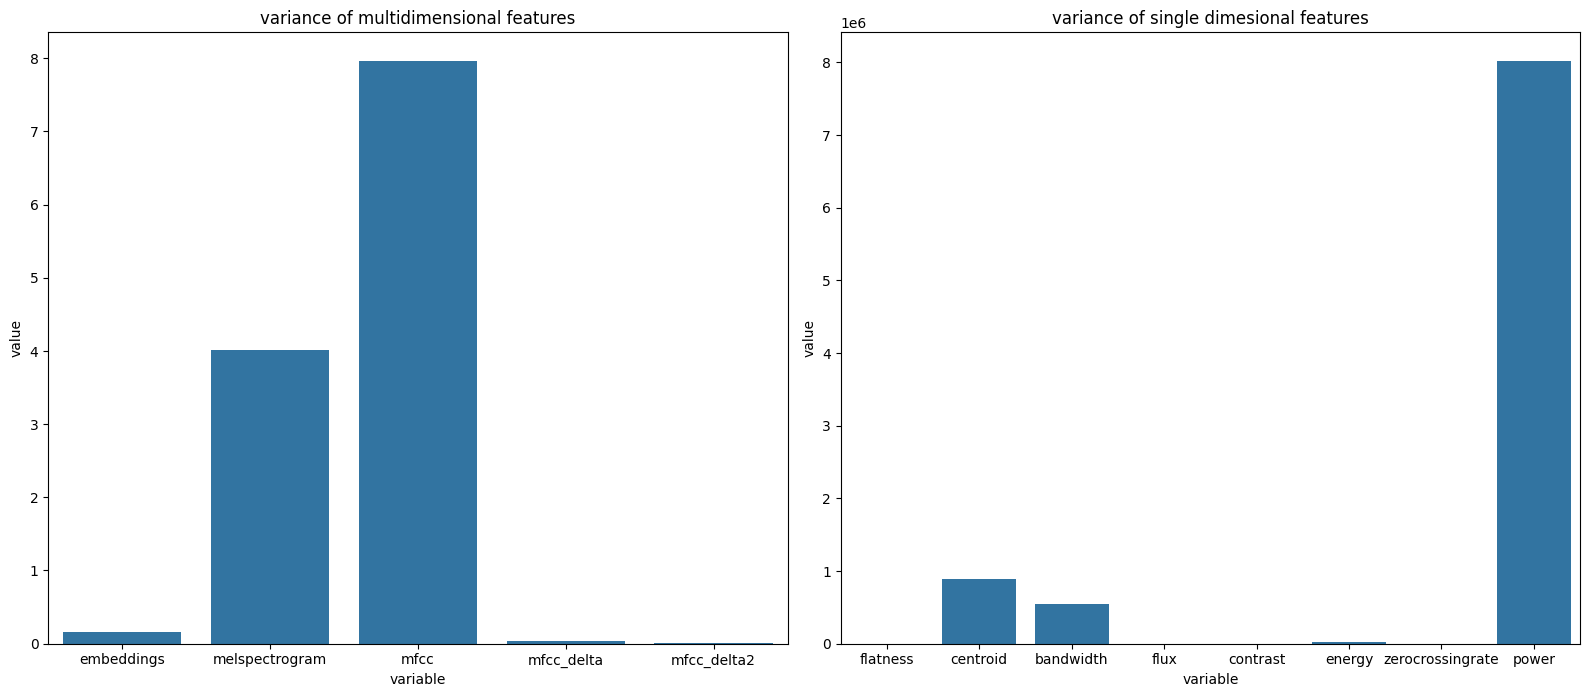

In [58]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
plot_df1 = var_df[["embeddings", "melspectrogram", "mfcc", "mfcc_delta", "mfcc_delta2"]].melt()
plot_df2= var_df[["flatness","centroid","bandwidth","flux","contrast","energy","zerocrossingrate","power"]].melt()
sns.barplot(data=plot_df1,x="variable",y="value",ax=ax[0])
sns.barplot(data=plot_df2,x="variable",y="value",ax=ax[1])
plt.tight_layout()
ax[0].set_title("variance of multidimensional features")
ax[1].set_title("variance of single dimesional features")

<Axes: >

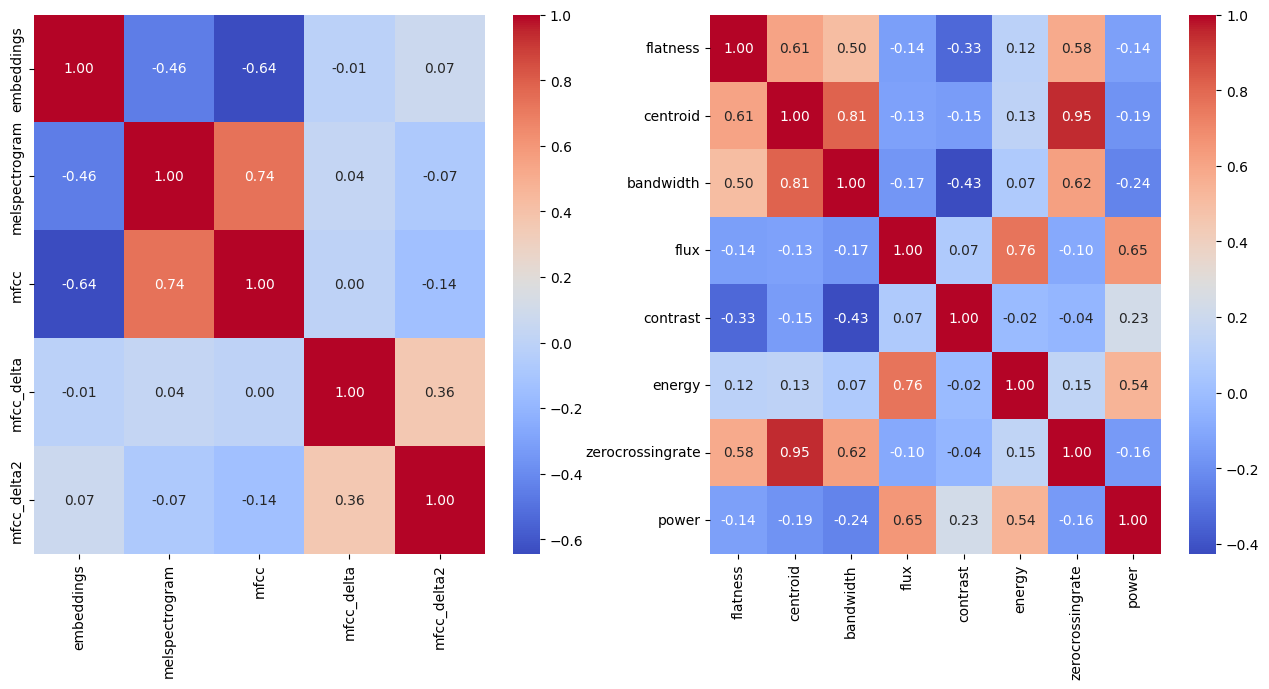

In [44]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
selected= ["embeddings","melspectrogram","mfcc","mfcc_delta","mfcc_delta2"]
s = ["flatness","centroid","bandwidth","flux","contrast","energy","zerocrossingrate","power"]
sns.heatmap(corr_matrix.loc[selected, selected], annot=True, cmap='coolwarm', fmt=".2f",ax=ax[0])
sns.heatmap(corr_matrix.loc[s, s], annot=True, cmap='coolwarm', fmt=".2f",ax=ax[1])

copy answer from task 3 of dataexploration since the plots are "identical"

**Taks 1c**

cluster the data with the two features with the highest variance while only labeling(color labeling) 2-4 chosen classes to check if they form tight clusters 

In [8]:
import numpy as np

mfcc_features = {}

for idx, row in meta_df.iterrows():
    file_name = idx.replace("mp3", "npz")
    path_to_feature_file = os.path.join(r"C:\Users\user\Desktop\MLPC\classification", "audio_features", file_name)
    
    features = np.load(path_to_feature_file)["mfcc"]
    mfcc_features[idx] = features
print("Number of feature files:", len(mfcc_features))

Number of feature files: 8230


In [24]:
import numpy as np

melspectrogram_features = {}

for file, in zip(meta_df["filename"]):
    file_name = file.replace("mp3", "npz")
    path_to_feature_file = os.path.join(r"C:\Users\user\Desktop\MLPC\classification", "audio_features", file_name)
    
    features = np.load(path_to_feature_file)["melspectrogram"]
    melspectrogram_features[file] = features
print("Number of feature files:", len(melspectrogram_features))

Number of feature files: 8230


In [25]:
import math
from sklearn.preprocessing import StandardScaler
def get_features_of_annotation(
    onset: float, 
    offset: float, 
    audio_features: np.ndarray, 

) -> np.ndarray:
    s= StandardScaler()
    RESOLUTION = 0.12 # temporal resolution of the features is 120 ms
    start_idx = math.floor(onset / RESOLUTION)
    offset_idx = math.ceil(offset / RESOLUTION)
    
    audio_features = audio_features[start_idx:offset_idx, :]
    
    audio_features = s.fit_transform(audio_features)    
    return audio_features.mean(axis=0)
#used code to extract mean mfcc value across all time frames  for each annotated region and ignored the silent regions since they have no corresponding annotations 

In [26]:
X1 = np.zeros((len(an_df), 32))
X2= np.zeros((len(an_df),64))

for i, row in an_df.iterrows():
    X1[i] = get_features_of_annotation(row['onset'], row['offset'], mfcc_features[row['filename']])
for i, row in an_df.iterrows():
    X2[i] = get_features_of_annotation(row['onset'], row['offset'], melspectrogram_features[row['filename']])

    
#used code to create a mfcc feature matrix with the shape of (35826,32) -> each row is a sample (annotated region) and the columns are the mfcc Cosine Transform coefficients. 

In [31]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X1_tsne = tsne.fit_transform(X1)
#X2_tsne = tsne.fit_transform(X2)
# perform tsne for vis -> since we cant vis a matrix in 2D!!!!

C:\Users\user\anaconda3\envs\computervision\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [83]:
an_df["hue_label"] = an_df["labels"].apply(lambda x: "Speech_car" if x in ["Speech", "Car"] else False)


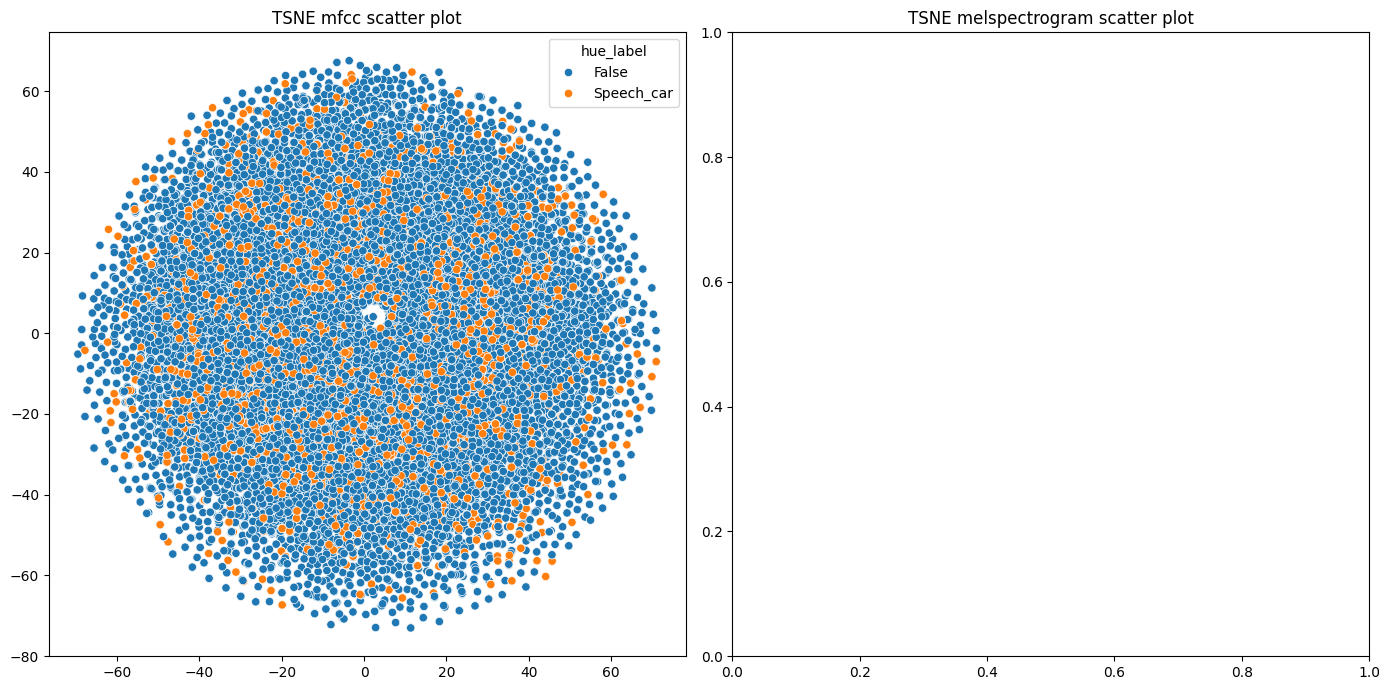

In [84]:
fig,ax = plt.subplots(1,2,figsize=(14,7))
sns.scatterplot(x=X1_tsne[:,0],y=X1_tsne[:,1],hue=an_df["hue_label"],ax=ax[0],legend=True)
#sns.scatterplot(x=X2_tsne[:,0],y=X2_tsne[:,1],hue=an_df["categories"][""],ax=ax[1],legend=True)
ax[0].set_title("TSNE mfcc scatter plot")
ax[1].set_title("TSNE melspectrogram scatter plot")
plt.tight_layout()


#assign colors to samples using "dog or cat" column to check if they form tight clusters in the mfcc feature space 